<a href="https://colab.research.google.com/github/Yanhuijun1911/PythonData/blob/main/FreeAgent_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Calculation
## Question 1
What % of ‘email’ companies signed up on a Saturday or Sunday?

In [ ]:
#reading the Data
import pandas as pd
from google.colab import files
import io

def get_data(n):
  
  !rm ga_signup_information*.csv #remove the same name files from colab
  !rm company_informationn*.csv 
  uploaded = files.upload()
  df = pd.read_csv(io.BytesIO(uploaded[n]))
  return df

df_ga = get_data('ga_signup_information.csv')
df_com = get_data('company_information.csv')

# cleaning data 
df_ga.dropna(inplace = True)

#seting the datetime and changeing the format
df_ga['free_trial_signup_date'] = pd.to_datetime(df_ga['free_trial_signup_date'])
df_ga['signup_day'] = df_ga['free_trial_signup_date'].dt.day_name()

#grouping data
df_wkd = df_ga[(df_ga['signup_day'] == 'Saturday') | (df_ga['signup_day'] =='Sunday')]   
df_wkd_e = df_wkd[df_wkd['google_analytics_medium'] =='email']

#calculating
Question_1 = df_wkd_e['company_id'].count() / df_ga['company_id'].count() * 100
Question_1 = round(Question_1, 2)
print(Question_1,'% of ‘email’ companies signed up on a Saturday or Sunday')


rm: cannot remove 'ga_signup_information*.csv': No such file or directory
rm: cannot remove 'company_informationn*.csv': No such file or directory


Saving ga_signup_information.csv to ga_signup_information.csv
rm: cannot remove 'company_informationn*.csv': No such file or directory


Saving company_information.csv to company_information (8).csv
2.78 % of ‘email’ companies signed up on a Saturday or Sunday


##Question 2
Are app users or non app users more likely to currently be a subscriber?

In [ ]:
#Filting data
df_app_sub = df_com[(df_com['subscription_status'] == 'Subscribed') & (df_com['app_user'] == True)]   #subscribers are app users

df_nonapp_sub = df_com[(df_com['subscription_status'] == 'Subscribed') & (df_com['app_user'] == False)]  #subscribers are non app users

#comparing the value
if df_nonapp_sub['app_user'].count() > df_app_sub['app_user'].count():
  print('Subscribers are more non-app users')
else:
  print('Subscribers are more app users')

Subscribers are more non-app users


##Question 3
Of companies that signed up on or after 1st July 2020, which medium had the highest average minutes activity on any device over the last 7 days?

In [ ]:
#merging dataset
df_new = pd.merge(df_ga, df_com, how = 'inner')

#grouping data
df_new = df_new[df_new['free_trial_signup_date'] >= '2020-07-01']
df_new = df_new.groupby(['google_analytics_medium'])
df_med_mean = df_new['minutes_activity_last_7_days_all_devices'].mean()

#cleaning and sorting data
df_med_mean = df_med_mean.drop(index = '(none)') 
df_med_mean = df_med_mean.sort_values(ascending=False)
print('"',df_med_mean.index[0],'" had the highest average minutes activity on any device over the last 7 days')


" organic " had the highest average minutes activity on any device over the last 7 days


#Investigation

Can the data predict whether the customers will subscribe or not?

rm: cannot remove 'ga_signup_information*.csv': No such file or directory
rm: cannot remove 'company_informationn*.csv': No such file or directory


Saving ga_signup_information.csv to ga_signup_information.csv
rm: cannot remove 'company_informationn*.csv': No such file or directory


Saving company_information.csv to company_information (9).csv
              precision    recall  f1-score   support

           0       0.81      0.99      0.89       297
           1       0.99      0.92      0.96       853

    accuracy                           0.94      1150
   macro avg       0.90      0.95      0.92      1150
weighted avg       0.95      0.94      0.94      1150

The accuracy is  0.9365217391304348


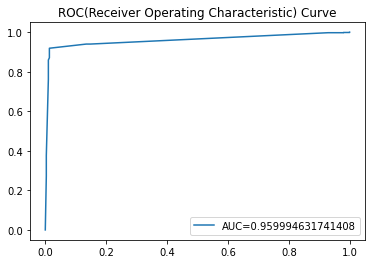

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report

#reading data
df_ga = get_data('ga_signup_information.csv')
df_com = get_data('company_information.csv')

#merging dataset
df_invest = pd.merge(df_ga, df_com)

#cleaning data
df_invest.dropna(inplace = True) #drop Null value

#filting data and getting data ready for statistical analysis

df_invest['ever_contacted_support'] = pd.get_dummies(df_invest['ever_contacted_support'], drop_first = True)
df_invest['subscription_status'] = pd.get_dummies(df_invest['subscription_status'], drop_first = True)
df_invest['app_user'] = pd.get_dummies(df_invest['app_user'], drop_first = True)

df_invest_new = df_invest.filter(items = ['ever_contacted_support','minutes_activity_last_7_days_all_devices','app_user','subscription_status'], axis = 1)

#since 'subscription_status' as dependent variable is binary, the logistic regression model id conducted.
#spliting data, setting the training and testing
x = df_invest_new.drop('subscription_status', axis = 1)    
y = df_invest_new['subscription_status']  #dependent variable
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)  #80% data for training and 20% for testing

# fitting in a model
model = LogisticRegression()
model.fit(x_train, y_train)
prediction = model.predict(x_test)

#model result
print(classification_report(y_test, prediction))
print('The accuracy is ', metrics.accuracy_score(y_test,prediction))

#plotting
prediction_proba = model.predict_proba(x_test)[::,1]
fpr, tpr,threhold= metrics.roc_curve(y_test,  prediction_proba)
auc = metrics.roc_auc_score(y_test, prediction_proba)    # auc (area under the curve)

plt.plot(fpr,tpr, label="AUC="+str(auc))
plt.title('ROC(Receiver Operating Characteristic) Curve')
plt.legend(loc=4)
plt.show()


####Explanation
A logistic regression model was created to investigate the relationship between the dependent variable 'subscribed_status' and other independent variables, including 'ever_contacted_support','minutes_activity_last_7_days_all_devices','app_user'. Because the variable 'subscribed_status' is binary. As the accuracy of the model is around 0.94, which is relatively high as well as the AUC, it is likely to predict whether cumstomers will subscribe or not through this model. Therefore, the dataset is likely to predict whether the companies will subscribe or not. This can be used to increase the number of subscriptions.